In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline 

import scipy.stats as stats # it for the QQplot 

In [2]:
import sklearn

# Print the version of scikit-learn
print("Scikit-learn version:", sklearn.__version__)


Scikit-learn version: 1.4.1.post1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

from sklearn.linear_model import LinearRegression 

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [4]:
dataframe = pd.read_csv('concrete_data.csv')
dataframe.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
455,213.5,0.0,174.2,159.2,11.7,1043.6,771.9,56,51.26
850,156.0,243.0,0.0,180.0,11.0,1022.0,698.0,28,37.36
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
942,313.3,145.0,0.0,178.5,8.0,867.2,824.0,28,40.93
274,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,3,17.22


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
dataframe.shape

(1030, 9)

In [7]:
dataframe.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
# here is no negrative values for box -cox transfomer 
dataframe.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
dataframe.duplicated().sum()

25

In [10]:
dataframe = dataframe.drop_duplicates()

In [11]:
dataframe.duplicated().sum()

0

In [12]:
x = dataframe.drop(columns=['Strength'],axis = 1)
y = dataframe.iloc[:,-1]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [14]:
# Applying Regression without any transfomation 
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

r2_score(y_test,y_pred)


0.5801703029028777

In [15]:
# Cross checking with cross val score 
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring = 'r2'))

0.47680010562839026

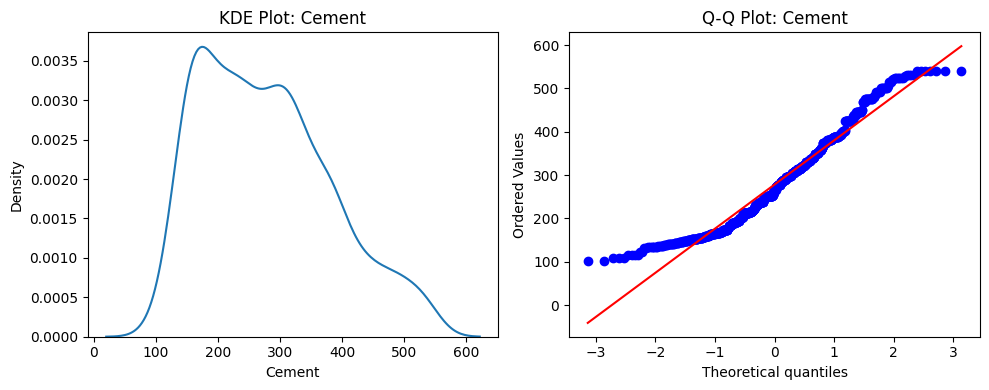

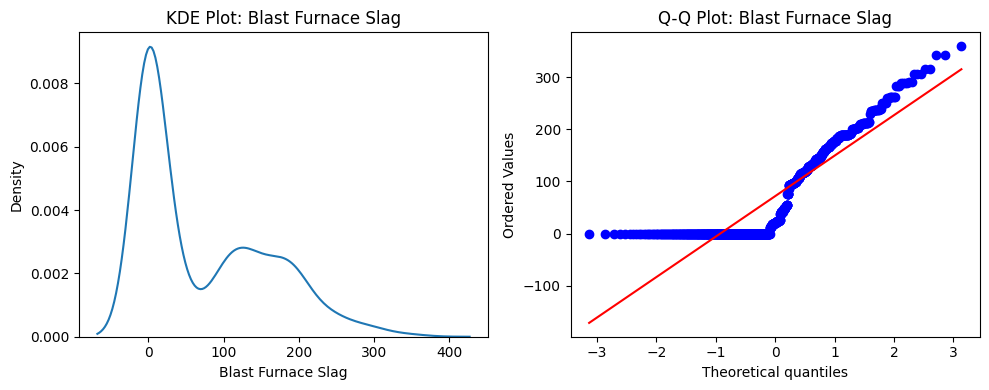

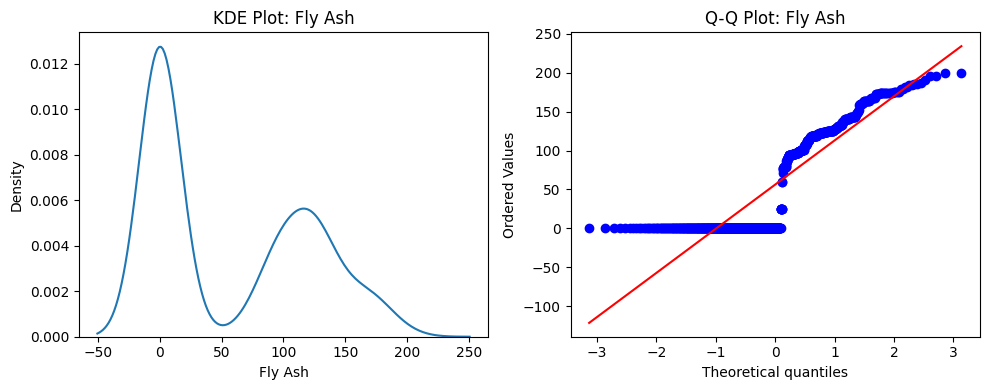

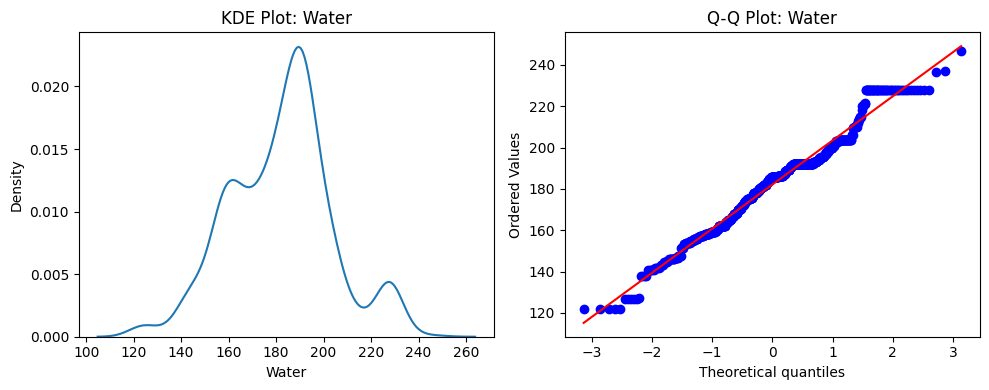

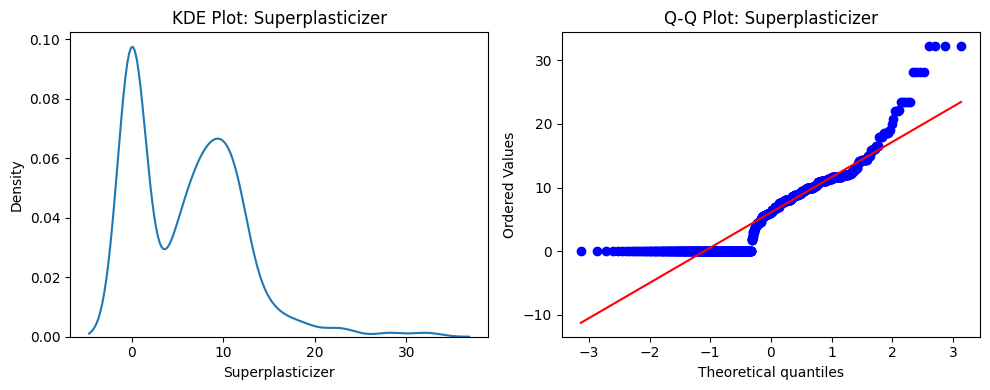

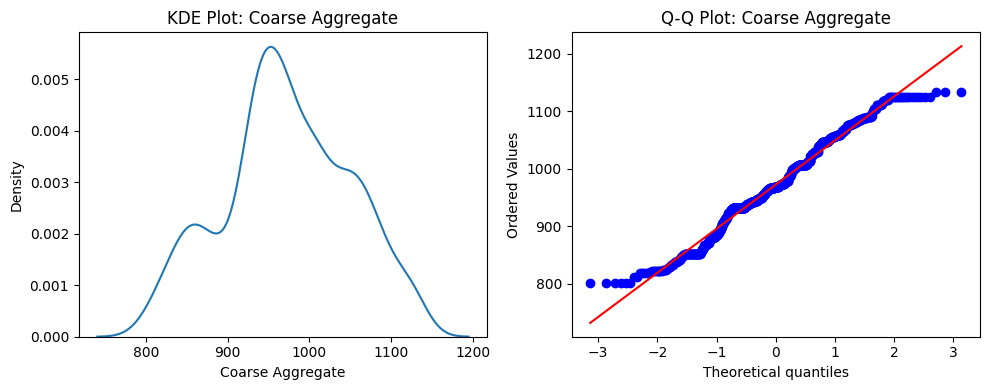

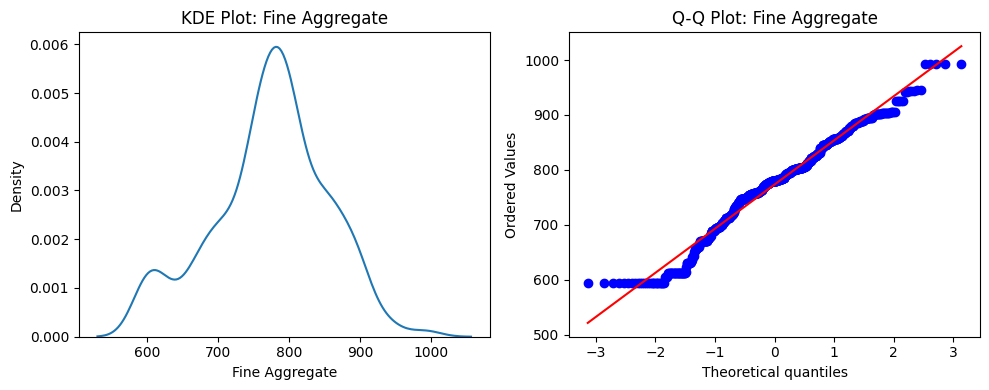

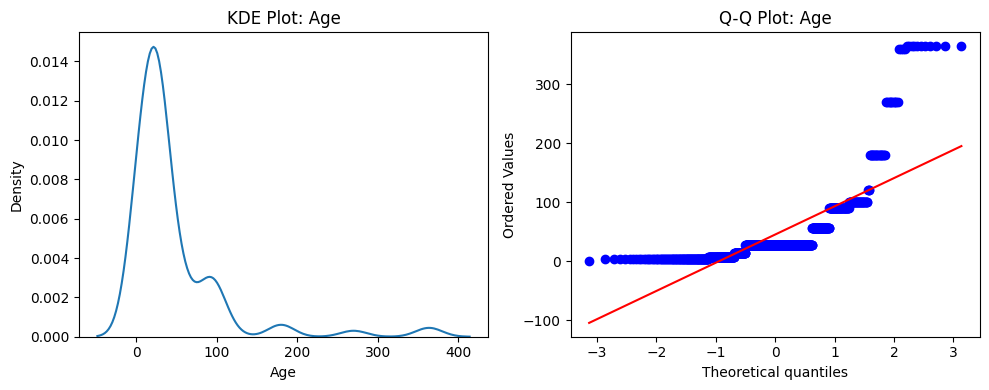

In [16]:

# Assuming x_train is your DataFrame with the data

for col in x_train.columns:
    plt.figure(figsize=(10, 4))
    
    # Plot KDE plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(x_train[col])
    plt.title(f'KDE Plot: {col}')
    
    # Plot Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {col}')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()


In [17]:
# Applying Box-cox Tranformer 
pt = PowerTransformer(method = 'box-cox')
x_train_transformed = pt.fit_transform(x_train+0.000001)  # here we add the 0.000001 for making the box-cox 
x_test_transformed = pt.transform(x_test+0.000001)

pd.DataFrame({'cols':x_train.columns,'':pt.lambdas_})
# here the given data lambda calcluted vlaues is thier in the data frame

,cols,box_cox_lambdas
0,Cement,0.101285
1,Blast Furnace Slag,0.021772
2,Fly Ash,-0.023566
3,Water,0.950247
4,Superplasticizer,0.094528
5,Coarse Aggregate,1.198571
6,Fine Aggregate,1.911749
7,Age,0.051998


In [18]:
# Truncate x_test_transformed to match y_train's number of rows
x_test_transformed = x_test_transformed[:y_train.shape[0], :]
x_train_transformed = x_train_transformed[:y_train.shape[0], :]

In [19]:
# Applying linear regression on transformed data 

lr = LinearRegression()
lr.fit(x_train_transformed,y_train)

y_pred2 = lr.predict(x_test_transformed)

r2_score(y_test,y_pred2)

0.7940036243935858

In [20]:
# using cross val score 

pt = PowerTransformer(method = 'box-cox')
x_transformed = pt.fit_transform(x+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed,y,scoring='r2'))

0.675677556739414

In [21]:
# here we convered to the dataframe 
x_train_transformed_df = pd.DataFrame(x_train_transformed, columns=x_train.columns)
x_train_transformed_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.945366,-1.074514,-0.930113,-1.880523,1.075126,-1.549309,1.562762,-1.708520
1,1.629182,-1.074514,-0.930113,2.122190,-1.287545,-0.531791,-2.053865,-1.044997
2,0.157051,-1.074514,1.059598,-0.999153,0.842354,0.008866,1.306800,-1.708520
3,1.389759,-1.074514,-0.930113,1.662366,-1.287545,-1.721929,-0.699036,0.105681
4,-1.157850,1.038271,-0.930113,0.993740,-1.287545,0.030901,-1.011088,-1.044997
...,...,...,...,...,...,...,...,...
799,0.689590,1.000835,-0.930113,-0.332216,0.787346,-0.368417,-0.266425,-1.044997
800,-1.126245,0.804569,1.080611,-1.106692,0.819750,1.408914,0.240550,-1.708520
801,-1.374908,0.965676,1.072413,-0.188001,0.744539,-1.360943,0.603361,0.105681
802,-1.185226,0.949716,1.085837,-0.322908,0.747610,0.423607,-0.378507,1.237890


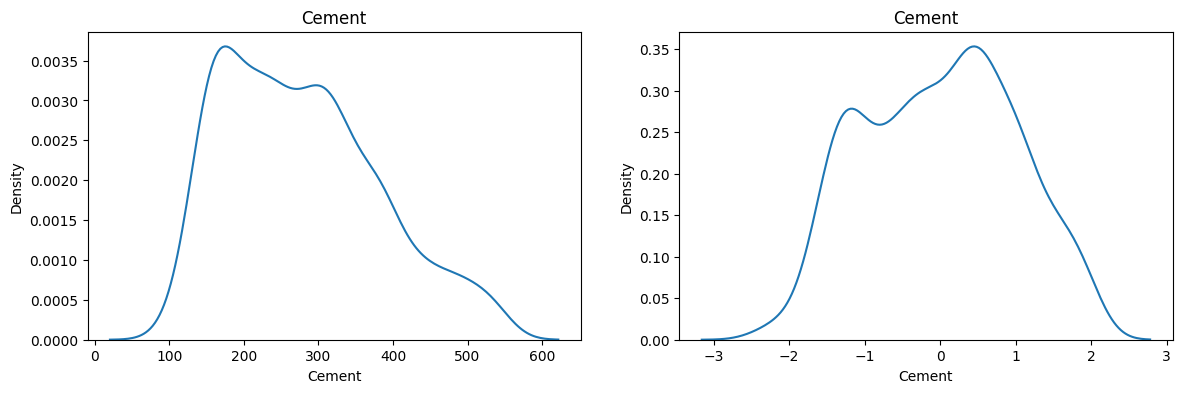

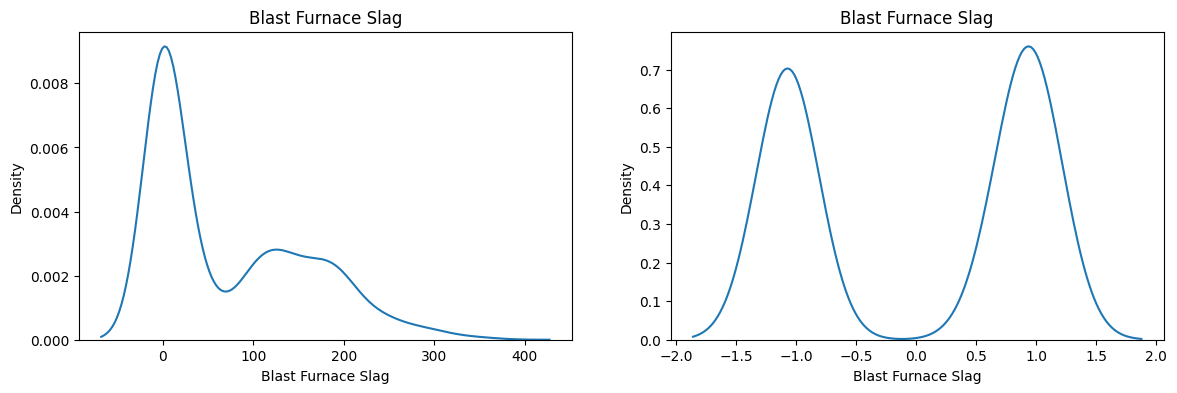

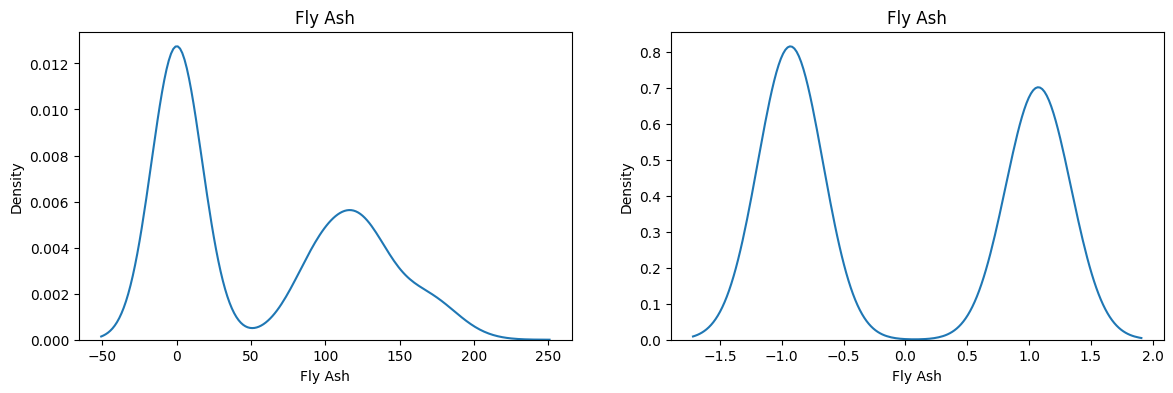

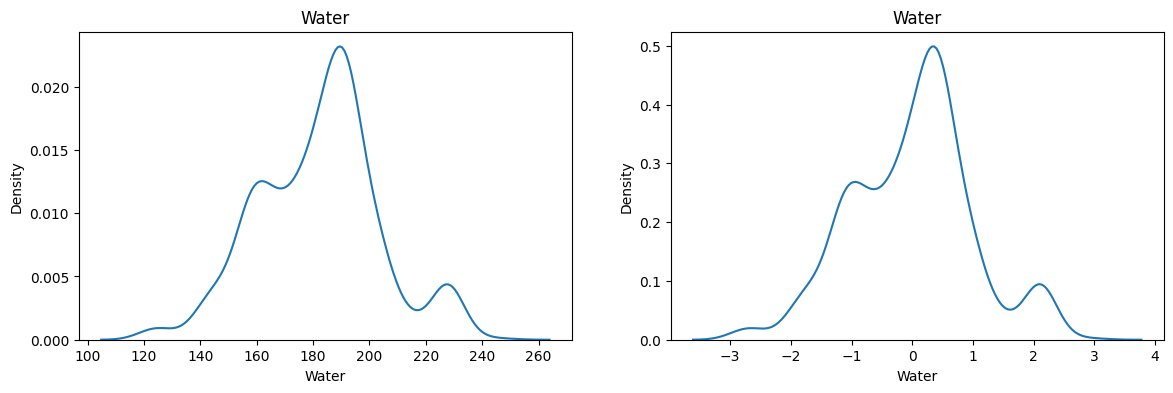

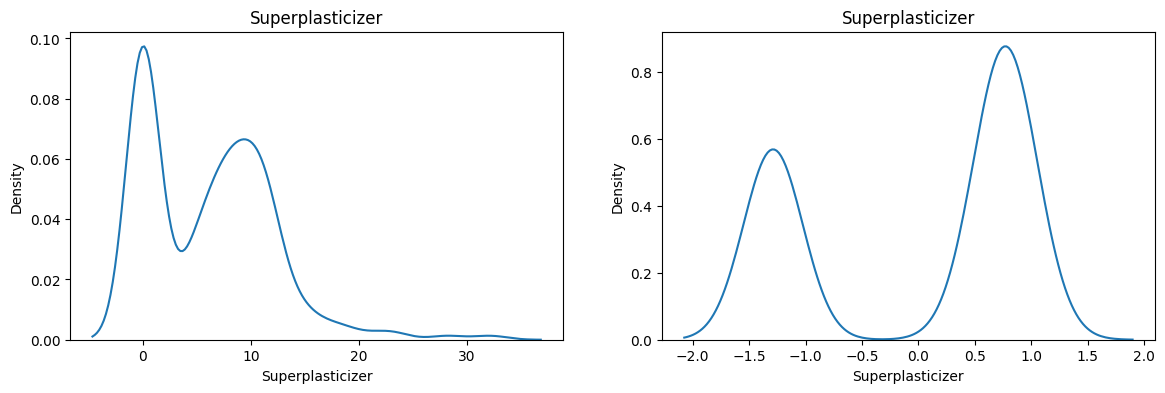

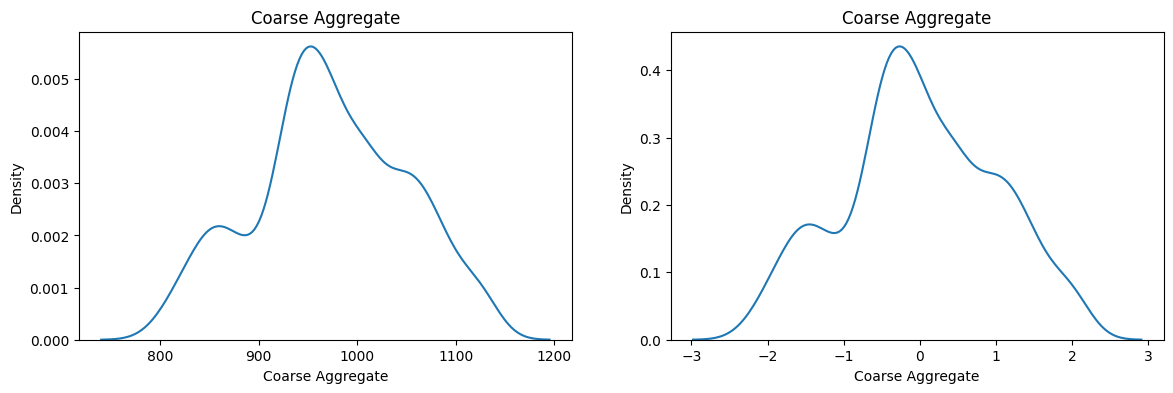

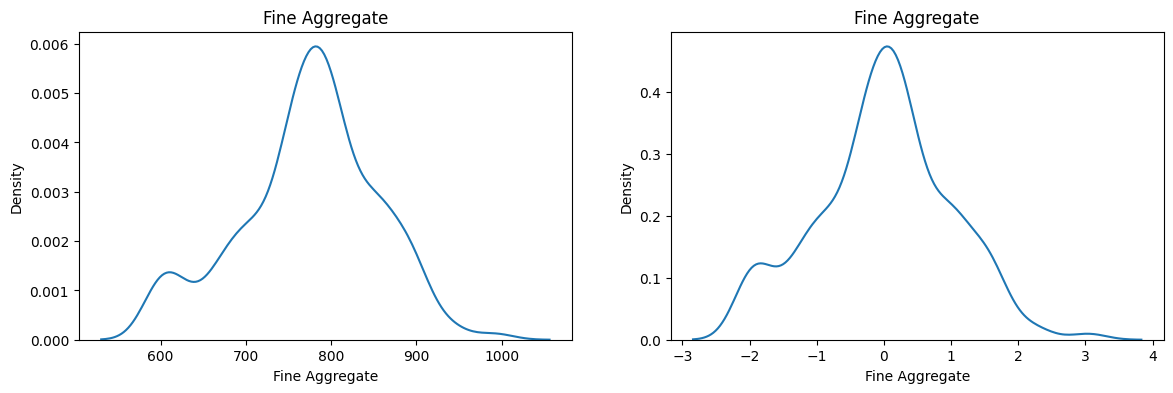

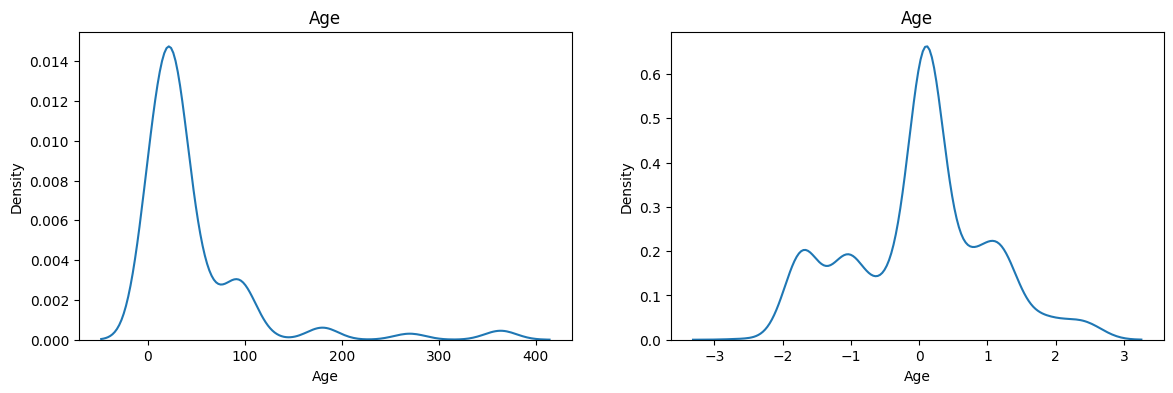

In [22]:
# Before and afer comparision for Box-cox Plot

for col in x_train_transformed_df.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(x_train_transformed_df[col])
    plt.title(col)

    plt.show()

In [23]:
# now here applying the yeo-Johson transfomer 

pt1 = PowerTransformer()

x_trian_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.transform(x_test)

lr = LinearRegression()
lr.fit(x_trian_transformed2,y_train)

y_pred3 = lr.predict(x_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':x_train.columns,'Yeo_Johnson':pt1.lambdas_})
  # lambdas ---> it used to calulated the lambdas_ vlaues in the dataframe

0.7955560586024052


,cols,Yeo_Johnson
0,Cement,0.098283
1,Blast Furnace Slag,0.001796
2,Fly Ash,-0.101005
3,Water,0.949883
4,Superplasticizer,0.242384
5,Coarse Aggregate,1.198868
6,Fine Aggregate,1.912998
7,Age,0.005200


In [24]:
# here we chacking the accuray 
# applying aross val score 

pt = PowerTransformer()
x_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed2,y,scoring ='r2'))  # here our actual result 

0.6938787275349623

In [26]:
x_trian_transformed2 = pd.DataFrame(x_trian_transformed2,columns = x_train.columns)

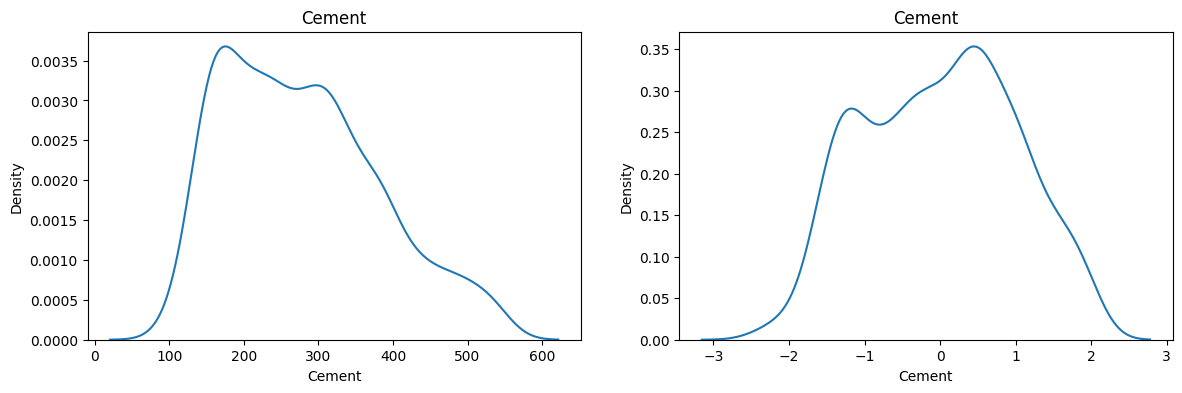

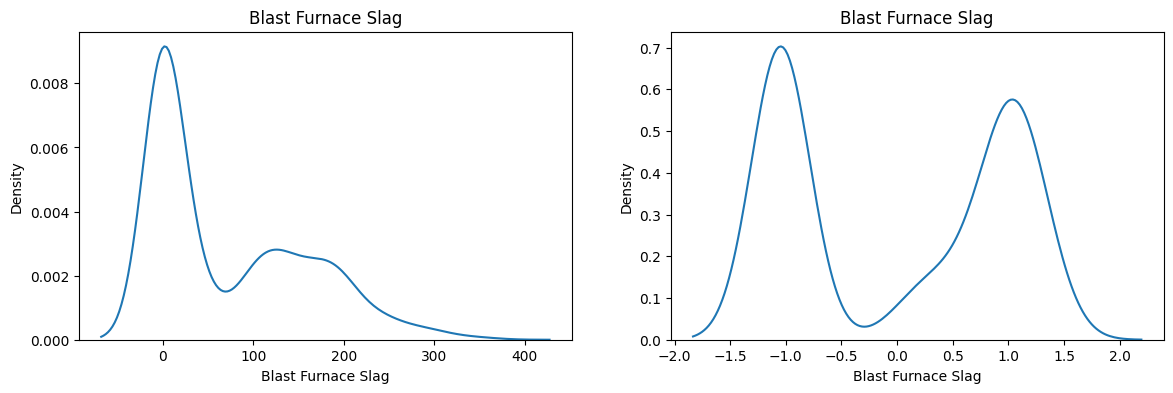

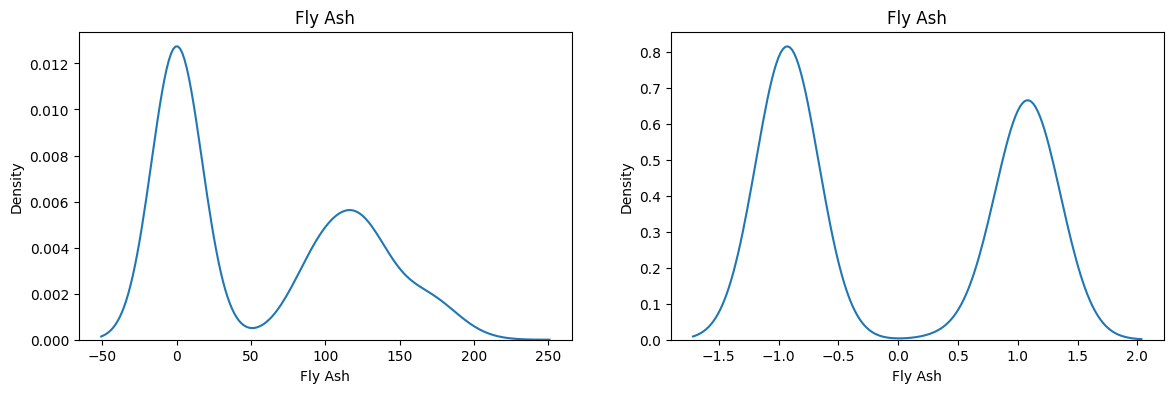

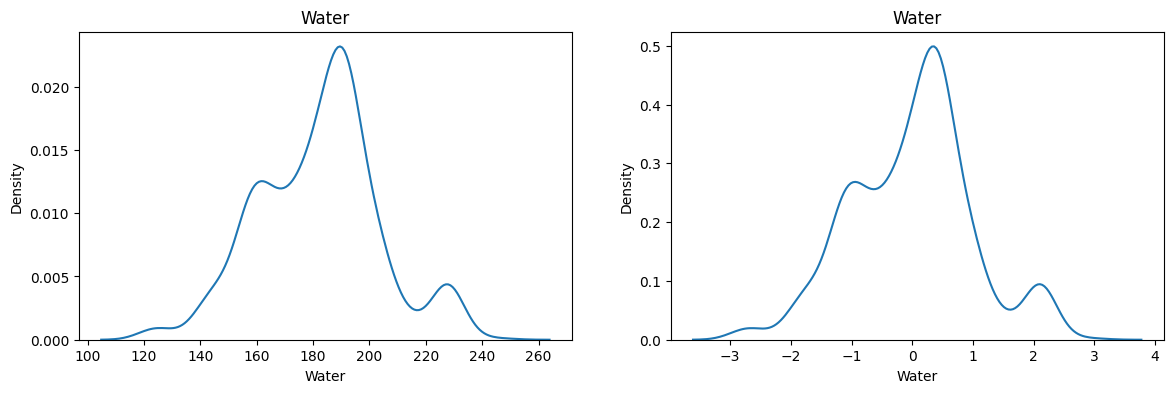

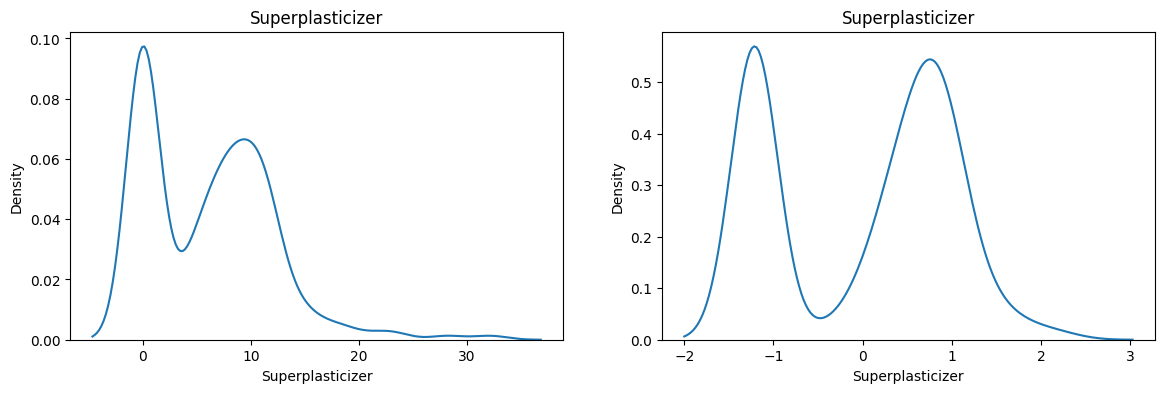

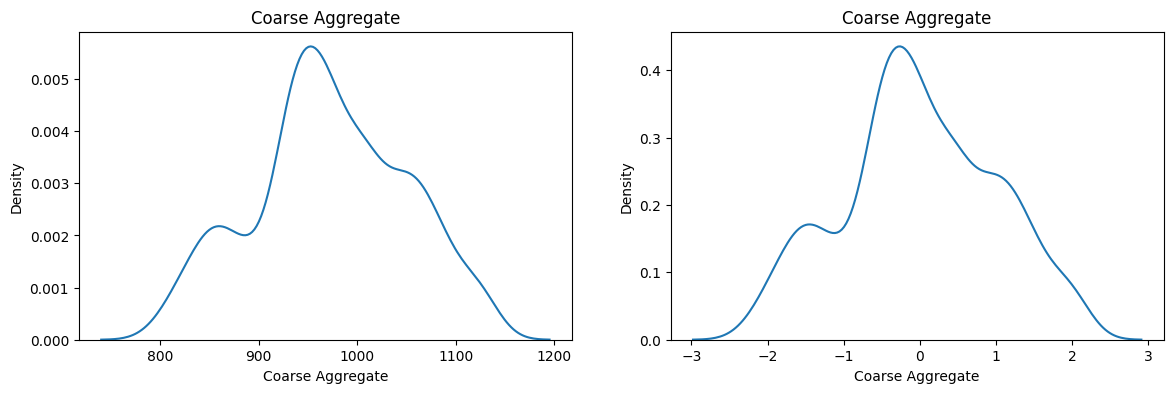

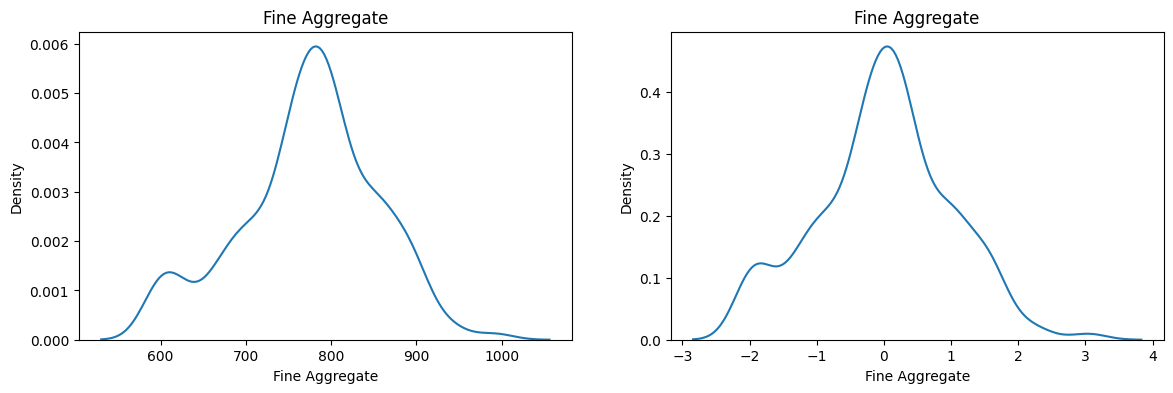

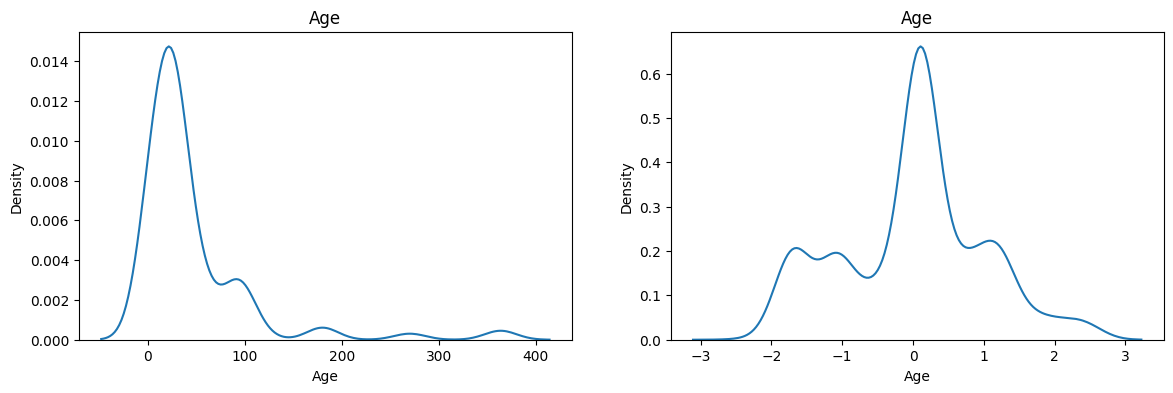

In [31]:
# Before and after comparision for Yeo - Johnson 

for col in x_trian_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x_train[col])
    plt.title(col)



    plt.subplot(122)
    sns.kdeplot(x_trian_transformed2[col])
    plt.title(col)

    plt.show()

In [33]:
# here now creating the new dataframe with the both lambdas values in the given 
pd.DataFrame({'col':x_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,col,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.113625,0.098283
1,Blast Furnace Slag,-0.005725,0.001796
2,Fly Ash,-0.109164,-0.101005
3,Water,0.923320,0.949883
4,Superplasticizer,0.238200,0.242384
5,Coarse Aggregate,1.265774,1.198868
6,Fine Aggregate,1.826589,1.912998
7,Age,-0.001972,0.005200
